In [1]:
from collections import defaultdict
from collections import Counter

users_sequences_dict = defaultdict(dict) # dictionary of users, each user have dictionary of sequences
commands_counter = defaultdict(int)
corpus = []
for i in range(40):
    fname = f'FraudedRawData/User{i}'
    file1 = open(fname, 'r')
    Lines = file1.readlines()
    striped_lines = []
    for ind, line in enumerate(Lines):
        striped_lines += [line.rstrip('\n') ]
        if (ind+1)%100 == 0:
            users_sequences_dict[int(i)][int(ind-99)] = striped_lines #[user number][start ind of seq]
            corpus.append(' '.join(striped_lines))
            counter_for_sequence = Counter(striped_lines)
            updated_commands_counter = {command:count+commands_counter[command] for command, count in counter_for_sequence.items()}
            commands_counter.update(updated_commands_counter)
            striped_lines = []
    
    

In [2]:
users_sequences_dict[0][0][:10] #User0, sequence 0-99

['cat', 'nawk', 'nawk', 'uname', 'pwd', 'echo', 'echo', 'ksh', 'uname', 'stty']

In [3]:
import matplotlib.pyplot as plt

def visualize_command_frequencies(commands_counter, frequency_thresold = 0):
    sorted_commands_counter = sorted(commands_counter.items(), key=lambda x: x[1], reverse=True)
    commands = [command for command, count in sorted_commands_counter if count>frequency_thresold]
    frequencies = [count for command, count in sorted_commands_counter if count>frequency_thresold]

    plt.figure(figsize=(20, 6))  # Set the size of the figure

    # Create a bar plot
    plt.bar(commands, frequencies)

    # Customize the plot
    plt.xlabel('Commands')
    plt.ylabel('Frequencies')
    plt.title('Commands Frequencies')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # Show the plot
    plt.tight_layout()  # Adjust the spacing of the plot elements
    plt.show()


# Vizualize all frequency:

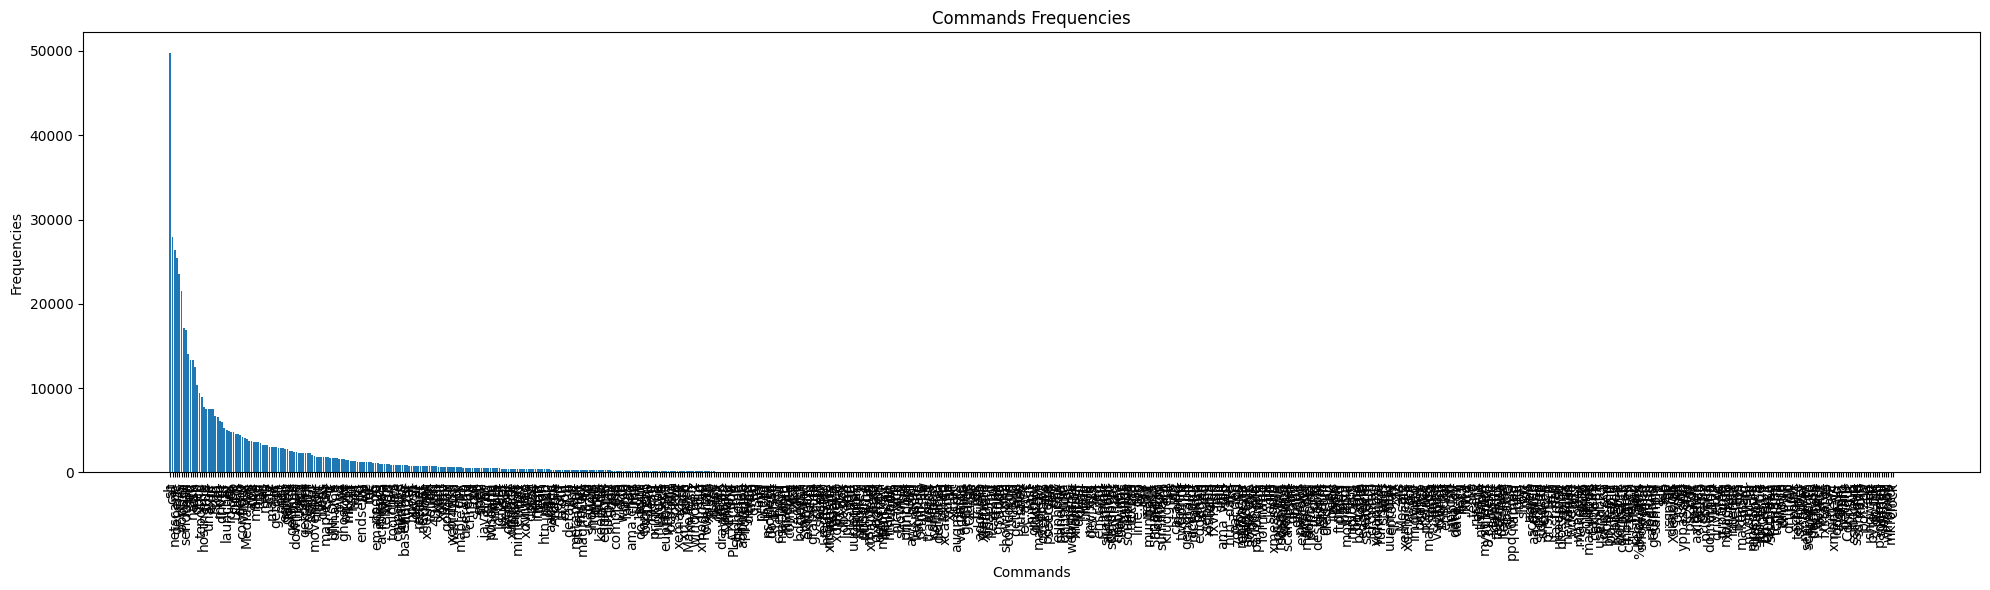

In [4]:
visualize_command_frequencies(commands_counter)

# Filter frequency bellow 100:

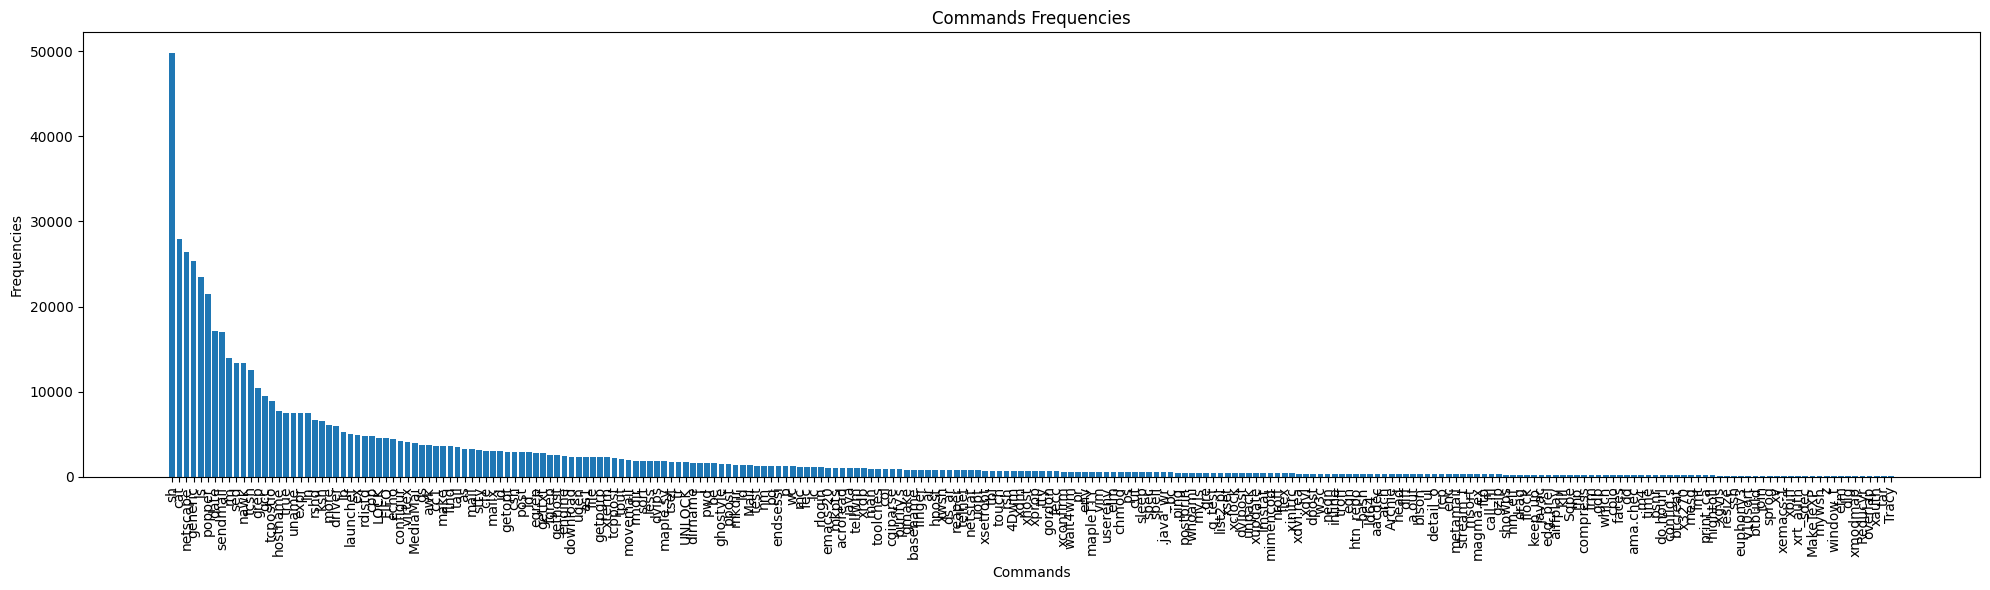

In [5]:
visualize_command_frequencies(commands_counter, frequency_thresold = 100)

In [6]:
# Vizualize commands lentgh:

In [7]:
len(commands_counter)

765

In [8]:
commands_length_dict = {command:len(command) for command in commands_counter.keys()}
min(commands_length_dict.values()), max(commands_length_dict.values())

(1, 8)

In [9]:
commands_length = defaultdict(int)
for command, length in commands_length_dict.items():
    commands_length[length] += 1

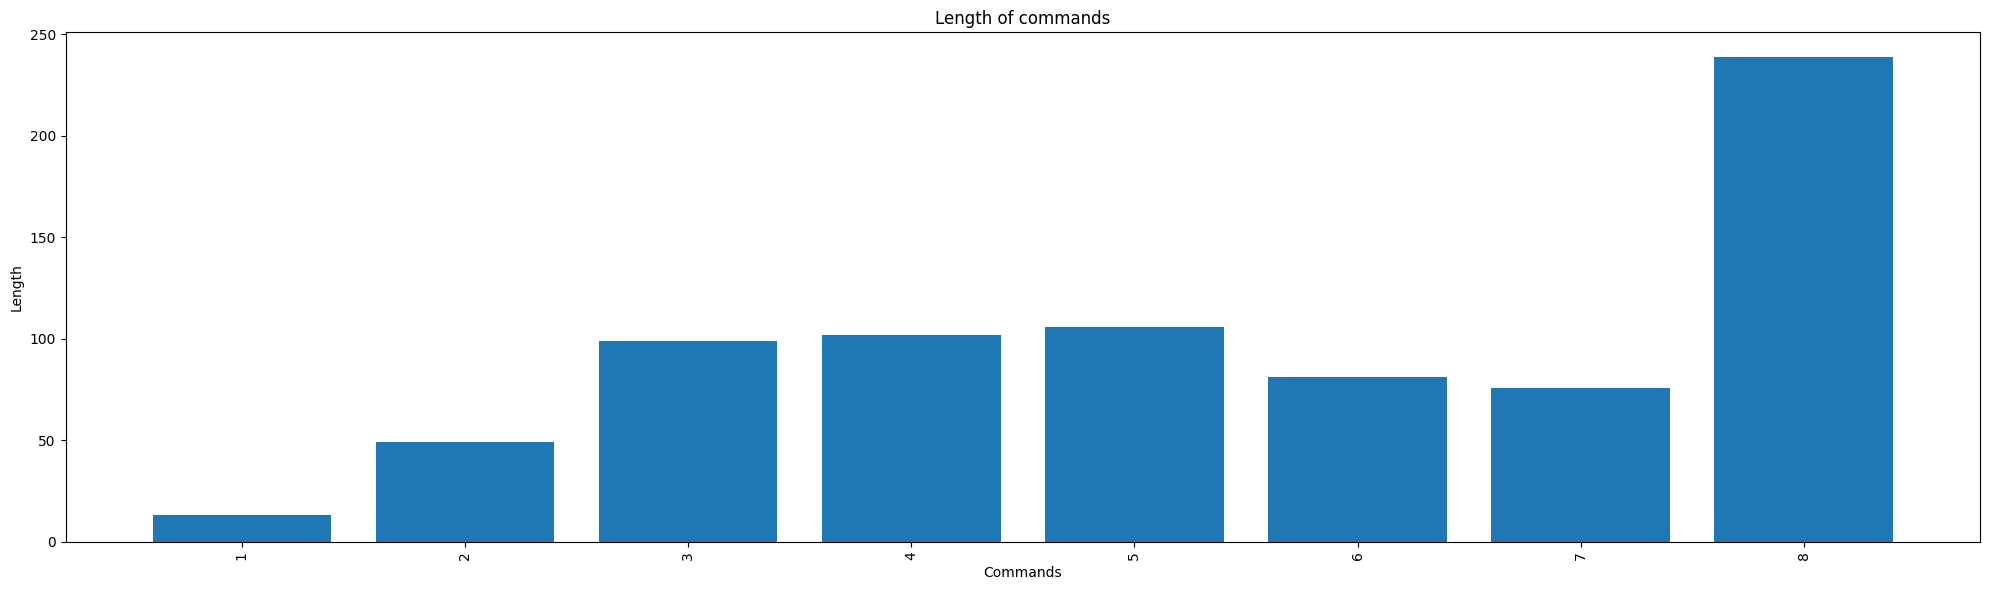

In [10]:
sorted_commands_length = sorted(commands_length.items(), key=lambda x: x[1], reverse=True)
commands = [command for command, count in sorted_commands_length]
lengths = [count for command, count in sorted_commands_length]

plt.figure(figsize=(20, 6))  # Set the size of the figure

# Create a bar plot
plt.bar(commands, lengths)

# Customize the plot
plt.xlabel('Commands')
plt.ylabel('Length')
plt.title('Length of commands')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
challengeToFill = pd.read_csv('challengeToFill.csv', index_col=False)

In [14]:
challengeToFill.head()

,Unnamed: 0,0-100,100-200,200-300,300-400,400-500,500-600,600-700,700-800,800-900,...,14000-14100,14100-14200,14200-14300,14300-14400,14400-14500,14500-14600,14600-14700,14700-14800,14800-14900,14900-15000
0,User0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,User1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,User2,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,User3,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,User4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import re 

# for user in users_sequences_dict
# users_sequences_dict['User0']
# seq = users_sequences_dict['User0']['0-100']
only_letters = lambda x: x.isalpha() #is string contains only letters
alphanumeric = lambda x: x.isalnum() #is string alphanumeric
only_numbers = lambda x: x.isdigit() #is string contains only numbers
only_uppers = lambda x: x.isupper() #is string contains only Capital letters
def conatains_uppers(x): #is string contains Capital letters
    for char in x:
        if char.isupper():
            return True
    return False

def special_letters(string): #is string contains special letters
    condition1 = re.compile('[@_!#$%^&*()<>?/\|}{~:]').search(string) != None 
    condition2 = string.find("+") != -1 or string.find("-") != -1 or string.find("_") != -1 or string.find(".") != -1 
    condition3 = string.find("%") != -1 or string.find("[") != -1 or string.find("]") != -1 
    return condition1 or condition2 or condition3
# seq
# for 

In [16]:
unique_commands = list(commands_counter.keys())
# unique_commands[:5]

In [17]:
len(unique_commands)

765

In [18]:
X = []
Y = []
for user, sequences in users_sequences_dict.items():
#     print(user)
    
    for seq_ind, seq_commands in sequences.items():
        sample = [0]*(6+len(unique_commands)) #frequencies + only_letters, alphanumeric, only_numbers, only_uppers, conatains_uppers, special_letters
        for command in seq_commands:
            if only_letters(command):
                sample[0] += 1
            if alphanumeric(command):
                sample[1] += 1
            if only_numbers(command):
                sample[2] += 1
            if only_uppers(command):
                sample[3] += 1
            if conatains_uppers(command):
                sample[4] += 1
            if special_letters(command):
                sample[5] += 1
        seq_commands_counter = Counter(seq_commands)
        for com_ind, com in enumerate(unique_commands):
            if com in seq_commands_counter:
                sample[6+com_ind] = seq_commands_counter[com]/commands_counter[com]
                
        #get label for the sequence:
        if user>=10 and seq_ind>= 5000: #There are not labels
            label = -1
        else: #get label
            label = challengeToFill.iloc[user,seq_ind//100+1]
        
        X.append(sample)
        Y.append(label)

In [19]:
X, Y = np.array(X), np.array(Y)

In [20]:
test_ind = np.where(Y == -1)[0]

In [21]:
test_ind

array([1550, 1551, 1552, ..., 5997, 5998, 5999], dtype=int64)

In [22]:
# mask_test = np.array([1 if i in test_ind else 0 for i in range(len(X))])

### Split train/validation set 

Start with spliting the malicious samples:

In [23]:
ind_malicious_samples = np.where(Y == 1)[0]
# mask_malicious = np.array([1 if i in ind_malicious_samples else 0 for i in range(len(X))])
malicious_samples_amount = int(len(ind_malicious_samples)*0.8)
train_malicious_inds = np.random.choice(ind_malicious_samples, size=malicious_samples_amount, replace=False)

In [24]:
validation_malicious_inds = np.array([], dtype=int)
for ind in ind_malicious_samples:
    if ind not in train_malicious_inds:
        validation_malicious_inds = np.append(validation_malicious_inds, ind)

Now split the benign samples:

In [25]:
ind_benign_samples = np.where(Y == 0)[0]
benign_samples_amount = int(len(ind_benign_samples)*0.8)
train_benign_inds = np.random.choice(ind_benign_samples, size=benign_samples_amount, replace=False)

validation_benign_inds = np.array([], dtype=int)
for ind in ind_benign_samples:
    if ind not in train_benign_inds:
        validation_benign_inds = np.append(validation_benign_inds, ind)

In [26]:
#Now we can split to train/validation
train_ind = np.append(train_malicious_inds, train_benign_inds)
val_ind = np.append(validation_malicious_inds, validation_benign_inds)
len(train_ind), len(val_ind), len(test_ind)


(2400, 600, 3000)

In [27]:
X_train, y_train = X[train_ind], Y[train_ind]
X_val, y_val = X[val_ind], Y[val_ind]
X_test, y_test = X[test_ind], Y[test_ind]

In [28]:
assert len(X_train) + len(X_val) + len(X_test) == len(X)
assert len(y_train) + len(y_val) + len(y_test) == len(Y)

In [29]:
import xgboost as xgb
# train, test = train_test_split(df, test_size=0.2)
# y_train, y_test = train['class'], test['class']
# X_train, X_test = train.drop('class', axis=1), test.drop('class', axis=1)

# # Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=5)
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [30]:
val_predict = xgb_classifier.predict(X_val)

In [31]:
np.where(val_predict!=0)

(array([  0,   3,   4,  15, 390], dtype=int64),)

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [33]:
y_prob = xgb_classifier.predict_proba(X_val)[:,1]

# print(f"Accuracy: {accuracy_score(y_val, val_predict):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_val, y_prob):.4f}")
print(f"Precision: {precision_score(y_val, val_predict):.4f}")
print(f"Recall: {recall_score(y_val, val_predict):.4f}")
print(f"F1 score: {f1_score(y_val, val_predict):.4f}")

AUC-ROC Score: 0.8942
Precision: 0.8000
Recall: 0.2000
F1 score: 0.3200


In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_classifier,  X[np.append(train_ind, val_ind)], Y[np.append(train_ind, val_ind)], cv=5, scoring="accuracy")

array([0.97      , 0.97      , 0.975     , 0.97166667, 0.97166667])

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_classifier,  X[np.append(train_ind, val_ind)], Y[np.append(train_ind, val_ind)], cv=5, scoring="f1")

array([0.25      , 0.25      , 0.44444444, 0.26086957, 0.32      ])

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_classifier,  X[np.append(train_ind, val_ind)], Y[np.append(train_ind, val_ind)], cv=5, scoring="precision")

array([0.75      , 0.75      , 0.85714286, 1.        , 0.8       ])

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_classifier,  X[np.append(train_ind, val_ind)], Y[np.append(train_ind, val_ind)], cv=5, scoring="recall")

array([0.15, 0.15, 0.3 , 0.15, 0.2 ])

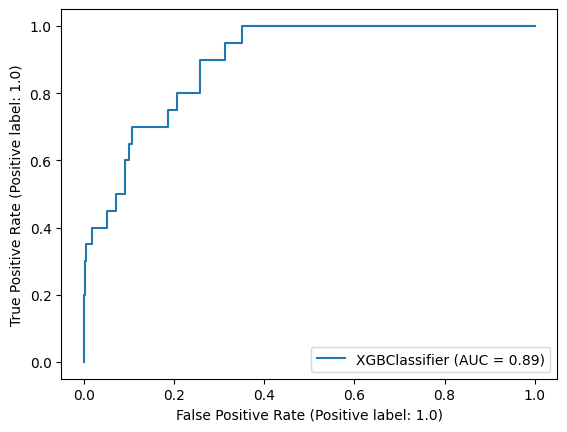

In [38]:
RocCurveDisplay.from_estimator(xgb_classifier, X_val, y_val)

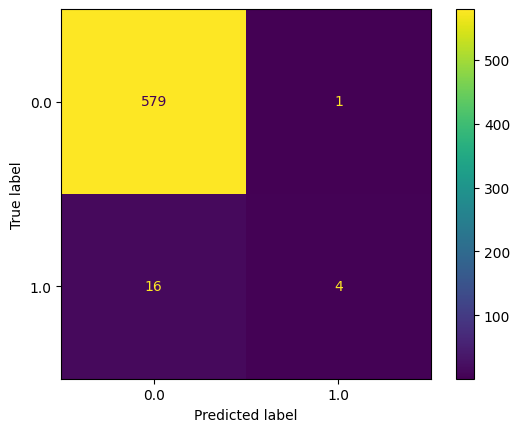

In [39]:
ConfusionMatrixDisplay.from_estimator(xgb_classifier, X_val, y_val)

In [40]:
y_pred_test = (xgb_classifier.predict_proba(X_test)[:,1] >= 0.1).astype(int)

In [41]:
y_pred_test

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
np.where(y_pred_test == 1)

(array([   2,   14,   28,   38,   53,   58,   60,   61,   63,   65,   66,
          67,   70,   71,   74,   91,   96,   99,  101,  103,  105,  112,
         113,  117,  119,  123,  126,  129,  132,  136,  137,  140,  145,
         152,  153,  155,  159,  160,  162,  177,  178,  179,  180,  183,
         189,  194,  197,  198,  199,  232,  233,  235,  237,  238,  239,
         241,  248,  252,  254,  255,  257,  259,  260,  262,  263,  264,
         266,  267,  268,  269,  270,  271,  272,  273,  274,  275,  277,
         278,  279,  280,  282,  283,  284,  285,  286,  288,  289,  291,
         292,  293,  296,  297,  298,  299,  300,  308,  310,  311,  312,
         315,  322,  323,  329,  332,  341,  346,  348,  362,  365,  367,
         379,  384,  390,  397,  398,  399,  407,  417,  422,  427,  432,
         435,  443,  477,  616,  620,  622,  632,  653,  654,  655,  667,
         673,  700,  701,  702,  703,  705,  706,  708,  709,  710,  711,
         712,  713,  714,  715,  717, 

In [43]:
filled_file = challengeToFill.copy()
filled_file.head()

,Unnamed: 0,0-100,100-200,200-300,300-400,400-500,500-600,600-700,700-800,800-900,...,14000-14100,14100-14200,14200-14300,14300-14400,14400-14500,14500-14600,14600-14700,14700-14800,14800-14900,14900-15000
0,User0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,User1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,User2,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,User3,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,User4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# for seg
counter_test_preds = 0
for row_ind, seg in filled_file.iterrows():
    user_name = seg['Unnamed: 0']
    if row_ind>9: #User > 10
        for col_ind in range(51,151):
            filled_file.iloc[row_ind,col_ind] = y_pred_test[counter_test_preds]
            counter_test_preds+=1
#             seg[i] = 8
        
        


In [45]:
filled_file

,Unnamed: 0,0-100,100-200,200-300,300-400,400-500,500-600,600-700,700-800,800-900,...,14000-14100,14100-14200,14200-14300,14300-14400,14400-14500,14500-14600,14600-14700,14700-14800,14800-14900,14900-15000
0,User0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,User1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,User2,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,User3,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,User4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,User5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,User6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,User7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,User8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,User9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
filled_file.to_csv('challengeToFill_filled_xgboost_0.1threshold.csv')